In [109]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings

red = (1, 87/255, 0.2)

# Parte 1

## Exploración Inicial

Abrimos el dataframe y vemos las primeras y últimas filas.

In [49]:
df = pd.read_csv('../data/police_killings.csv', encoding = "ISO-8859-1")
df

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


Para ver los tipos de datos de las columnas llamamos al `dtypes` del dataframe.

In [50]:
df.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

Y para ver los datos nulos por columna hacemos:

In [51]:
df.isna().sum()

name                     0
age                      0
gender                   0
raceethnicity            0
month                    0
day                      0
year                     0
streetaddress            4
city                     0
state                    0
latitude                 0
longitude                0
state_fp                 0
county_fp                0
tract_ce                 0
geo_id                   0
county_id                0
namelsad                 0
lawenforcementagency     0
cause                    0
armed                    0
pop                      0
share_white              0
share_black              0
share_hispanic           0
p_income                 0
h_income                 2
county_income            0
comp_income              2
county_bucket           27
nat_bucket               2
pov                      0
urate                    2
college                  2
dtype: int64

Y para entender mejor la forma de la data debemos saber que representa cada columna:

- *name*: Nombre del fallecido
- *age*: Edad del fallecido
- *gender*: Género del fallecido
- *raceethnicity*: Raza o etnia del fallecido
- *month*: Mes del asesinato
- *day*: Día del asesinato
- *year*: Año del asesinato
- *streetadress*: Dirección de donde ocurrió el asesinato
- *city*: Ciudad donde ocurrió el asesinato
- *state*: Estado de USA donde ocurrió el asesinato
- *latitude*: Latitud de la dirección
- *longitude*: Longitud de la dirección
- *state_fp*: Código FIPS de identificación del estado donde ocurrió el asesinato
- *county_fp*: Código FIPS de identificación del condado donde ocurrió el asesinato
- *tract_ce*: Código de identificación del censo del distrito
- *geo_id*: Identificador geográfico
- *county_id*: Identificador del condado
- *namelsad*: Descripción del distrito censal
- *lawenforcementagency*: Comisaría involucrada en el incidente
- *cause*: Causa de muerte
- *armed*: Si el/la fallecido/da estaba armado/a y con que
- *pop*: Cantidad de población del distrito
- *share_white*: Porcentaje de población blanca no hispano/a del distrito
- *share_black*: Porcentaje de población negra del distrito
- *share_hipanic*: Porcentaje de población hispano/latino del distrito
- *p_income*: Promedio de ingreso por persona por distrito
- *h_income*: Promedio de ingreso por familia por distrito
- *county_income*: Pormedio de ingreso por familia por condado
- *comp_income*: h_income/county_income
- *county_bucket*: Ingreso familiar, quintil dentro del condado
- *nat_bucket*: Ingreso familiar, qintil nacional
- *pov*: Tasa de pobreza a nivel distrito
- *urate*: Tasa de desempleo a nivel distrito
- *college*: Porcentaje de población de 25 o mas años con título universitario

Junto con la clasificación de cada tipo de variable:

- Variables cualitativas:
    - gender
    - race ethnicity
    - city
    - state
    - law enforcement agency
    - cause
    - armed
    
- Variables cualitativas despreciables
    - street address
    - namelsad
    - name

- Variables cuantitativas:
    - age
    - day
    - month
    - latitude/longitude
    - share_white 
    - share_black 
    - share_hispanic 
    - p_income
    - h_income
    - nat_bucket 
    - pov
    - urate 
    - college
    - county_income
    - county_bucket
    - nat_bucket
    - pop
    - comp_income   
   
- Variables cualitativas despreciables
    - year (pues todos los asesinatos del df ocurren en 2015)
    - state_fp
    - county_id
    - geo_id
    - tract_ce 
    - county_fp    

## Limpieza del Set de Datos

### Datos Nulos

Sabemos que el dataframe tiene bastantes datos nulos e inválidos los cuales debemos limpiar previo a realizar el análisis avanzado.

In [52]:
police_killings = df.copy().dropna(inplace=False)
police_killings

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


Vemos que limpiamos los datos nulos:

In [53]:
police_killings.isna().sum()

name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
latitude                0
longitude               0
state_fp                0
county_fp               0
tract_ce                0
geo_id                  0
county_id               0
namelsad                0
lawenforcementagency    0
cause                   0
armed                   0
pop                     0
share_white             0
share_black             0
share_hispanic          0
p_income                0
h_income                0
county_income           0
comp_income             0
county_bucket           0
nat_bucket              0
pov                     0
urate                   0
college                 0
dtype: int64

### Drop de Variables Innecesarias

Como la variable año solo tiene como valor 2015 hardcodeado en todas las filas (pues el set de datos corresponde a asesinatos cometidos en 2015) podemos droppearlo pues no aporta información útil al análisis.

In [54]:
police_killings['year'].unique()

array([2015])

In [55]:
police_killings.drop(columns=['year'], inplace=True)

También droppearemos las variables `street address` pues preferimos analizar la latitud/longitud antes que una dirección y `namelsad` y `name` porque no son datos relevantes al análisis. 

In [56]:
police_killings.drop(columns=['streetaddress', 'namelsad', 'name'], inplace=True)

Por el lado de las variables cuantitativas droppearemos `state_fp`, `county_id`, `geo_id`, `tract_ce` y `county_fp` por ser IDs no relevantes para el análisis exploratorio.

In [57]:
police_killings.drop(columns=['state_fp', 'county_id', 'geo_id', 'tract_ce','county_fp'], inplace=True)

In [58]:
police_killings.T

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
age,16,27,26,25,29,29,22,35,44,31,...,50,40,35,53,59,18,28,52,38,48
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
raceethnicity,Black,White,White,Hispanic/Latino,White,White,Hispanic/Latino,Hispanic/Latino,White,White,...,Black,White,Hispanic/Latino,White,Unknown,Black,Native American,White,Black,Unknown
month,February,April,March,March,March,March,March,March,January,February,...,April,January,February,March,January,April,April,March,February,January
day,23,2,14,11,19,7,27,26,28,7,...,4,29,5,10,25,22,4,16,3,16
city,Millbrook,Pineville,Kenosha,South Gate,Munroe Falls,Phoenix,Bakersfield,Wilmington,Sunset,Wyoming,...,North Charleston,Forth Worth,Electra,Hoover,Berlin,Portsmouth,Tonasket,Gaston,Oakland,Fremont
state,AL,LA,WI,CA,OH,AZ,CA,CA,TX,MI,...,SC,TX,TX,AL,NJ,VA,WA,NC,CA,CA
latitude,32.529577,31.321739,42.58356,33.939298,41.148575,33.46938,35.395697,33.79305,30.665304,42.893238,...,32.899113,32.6786,34.044584,33.414931,39.749119,36.829014,48.708542,35.205776,37.827129,37.586471
longitude,-86.362829,-92.43486,-87.83571,-118.219463,-81.429878,-112.04332,-119.002745,-118.270926,-96.401482,-85.660584,...,-80.013802,-97.380737,-98.931198,-86.851557,-74.929306,-76.341438,-119.436829,-81.240669,-122.284492,-122.06001
lawenforcementagency,Millbrook Police Department,Rapides Parish Sheriff's Office,Kenosha Police Department,South Gate Police Department,Kent Police Department,Phoenix Police Department,Bakersfield Police Department,Los Angeles Police Department,Wise County Sheriff's Department and Texas DPS,Kentwood Police Department and Wyoming DPS,...,North Charleston Police Department,Fort Worth Police Department,Wichita County Sheriff's Office,Hoover Police Department,Winslow Police Department,Portsmouth Police Department,US Forest Service,Gaston County Police Department,Emeryville Police Department,Fremont Police Department


### Segregación por Tipo de Dato

Para facilitar el trabajo vamos a separar el dataframe en dos. Uno será utilizado para el análisis cuantitativo y el otro para el cualitativo.

In [59]:
columnas_cualitativas = ["gender", 
                         "raceethnicity", 
                         "month",
                         "city", 
                         "state", 
                         "lawenforcementagency", 
                         "cause", 
                         "armed"] 
columnas_cuantitativas = ["age",
                          "day",
                          "month",
                          "latitude",
                          "longitude",
                          "share_white", 
                          "share_black", 
                          "share_hispanic", 
                          "p_income",
                          "h_income",
                          "nat_bucket", 
                          "pov",
                          "urate", 
                          "college",
                          "county_income",
                          "county_bucket",
                          "nat_bucket",
                          "pop",
                          "comp_income"]

In [60]:
df_cualitativas = police_killings[columnas_cualitativas]
df_cualitativas.T

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male
raceethnicity,Black,White,White,Hispanic/Latino,White,White,Hispanic/Latino,Hispanic/Latino,White,White,...,Black,White,Hispanic/Latino,White,Unknown,Black,Native American,White,Black,Unknown
month,February,April,March,March,March,March,March,March,January,February,...,April,January,February,March,January,April,April,March,February,January
city,Millbrook,Pineville,Kenosha,South Gate,Munroe Falls,Phoenix,Bakersfield,Wilmington,Sunset,Wyoming,...,North Charleston,Forth Worth,Electra,Hoover,Berlin,Portsmouth,Tonasket,Gaston,Oakland,Fremont
state,AL,LA,WI,CA,OH,AZ,CA,CA,TX,MI,...,SC,TX,TX,AL,NJ,VA,WA,NC,CA,CA
lawenforcementagency,Millbrook Police Department,Rapides Parish Sheriff's Office,Kenosha Police Department,South Gate Police Department,Kent Police Department,Phoenix Police Department,Bakersfield Police Department,Los Angeles Police Department,Wise County Sheriff's Department and Texas DPS,Kentwood Police Department and Wyoming DPS,...,North Charleston Police Department,Fort Worth Police Department,Wichita County Sheriff's Office,Hoover Police Department,Winslow Police Department,Portsmouth Police Department,US Forest Service,Gaston County Police Department,Emeryville Police Department,Fremont Police Department
cause,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,Gunshot,...,Gunshot,Gunshot,Taser,Gunshot,Gunshot,Gunshot,Taser,Gunshot,Gunshot,Gunshot
armed,No,No,No,Firearm,No,No,Firearm,Non-lethal firearm,Firearm,Other,...,Knife,Unknown,Unknown,No,Non-lethal firearm,No,Firearm,Firearm,Firearm,Firearm


In [61]:
df_cuantitativas = police_killings[columnas_cuantitativas]
df_cuantitativas.T

,0,1,2,3,4,5,6,7,8,9,...,457,458,459,460,461,462,463,464,465,466
age,16,27,26,25,29,29,22,35,44,31,...,50,40,35,53,59,18,28,52,38,48
day,23,2,14,11,19,7,27,26,28,7,...,4,29,5,10,25,22,4,16,3,16
month,February,April,March,March,March,March,March,March,January,February,...,April,January,February,March,January,April,April,March,February,January
latitude,32.529577,31.321739,42.58356,33.939298,41.148575,33.46938,35.395697,33.79305,30.665304,42.893238,...,32.899113,32.6786,34.044584,33.414931,39.749119,36.829014,48.708542,35.205776,37.827129,37.586471
longitude,-86.362829,-92.43486,-87.83571,-118.219463,-81.429878,-112.04332,-119.002745,-118.270926,-96.401482,-85.660584,...,-80.013802,-97.380737,-98.931198,-86.851557,-74.929306,-76.341438,-119.436829,-81.240669,-122.284492,-122.06001
share_white,60.5,53.8,73.8,1.2,92.5,7,50.8,8.6,14.6,63.6,...,15.8,89.2,94.8,84.7,64.3,40.9,74.5,83.2,21.7,23.1
share_black,30.5,36.2,7.7,0.6,1.4,7.7,0.3,0.2,17.7,7.7,...,65.2,0.9,0,1.4,16.9,53.8,0.4,10.1,24.9,4
share_hispanic,5.6,0.5,16.8,98.8,1.7,79,44.2,84.1,66.3,26.5,...,18.6,6,2.5,7.7,4.9,0,20.2,0.3,37.1,12.3
p_income,28375,14678,25286,17194,33954,15523,25949,25043,16778,22005,...,14963,54494,31761,42312,31470,25262,18470,21175,26971,33590
h_income,51367.0,27972.0,45365.0,48295.0,68785.0,20833.0,58068.0,66543.0,30391.0,44553.0,...,19988.0,102938.0,62817.0,81996.0,65759.0,27418.0,35608.0,38200.0,63052.0,88940.0


# Análisis Cualitativo

Necesitamos generar gráficos de barra que muestren las cantidades de cada valor por feature. Para esto necesitamos tener un dataframe con todas las cantidades.

Vamos a mostrar como vamos a hacer esto para el género:

In [62]:
genderSize = df_cualitativas.groupby(['gender']).size()
df_genderSize = genderSize.to_frame(name='cantidad')
df_genderSize

,cantidad
gender,
Female,22
Male,414


Este proceso, de creacion de dataframes lo vamos a repetir en un loop para cada feature cualitativo y luego los mergearemos en un único dataframe.

In [69]:
feature_size_df_list = []
for col in columnas_cualitativas:
    feature_size_df_list.append(df_cualitativas.groupby([col]).size().to_frame(name='cantidad'))
df_merged = pd.concat(feature_size_df_list, keys=columnas_cualitativas)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_merged)

cantidad
gender               Female                                                    22
                     Male                                                     414
raceethnicity        Asian/Pacific Islander                                    10
                     Black                                                    127
                     Hispanic/Latino                                           65
                     Native American                                            4
                     Unknown                                                   14
                     White                                                    216
month                April                                                     90
                     February                                                  82
                     January                                                   83
                     June                                                       1
                     March                                                    110
                     May                                                       70
city                 Albany                                                     1
                     Albuquerque                                                2
                     Allentown                                                  1
                     Aloha                                                      1
                     Alpine                                                     1
                     Alton                                                      1
                     Anaheim                                                    2
                     Anchorage                                                  2
                     Antioch                                                    1
                     Apple Valley                                               1
                     Arcola                                                     1
                     Arlington                                                  2
                     Assaria                                                    1
                     Atlanta                                                    3
                     Aurora                                                     2
                     Austin                                                     3
                     Bakersfield                                                3
                     Baltimore                                                  2
                     Baton Rouge                                                1
                     Bay City                                                   1
                     Bay Minette                                                1
                     Bay Shore                                                  1
                     Baytown                                                    1
                     Beacon                                                     1
                     Berlin                                                     1
                     Billings                                                   1
                     Birmingham                                                 2
                     Bisbee                                                     1
                     Bloomington                                                1
                     Boiling Springs                                            1
                     Boise                                                      1
                     Boulder                                                    1
                     Boulder City                                               1
                     Branford                                                   1
                     Burbank                           

Con estos datos calculados, podemos acceder al dataframe resultante para realizar los gráficos de barra pedidos:

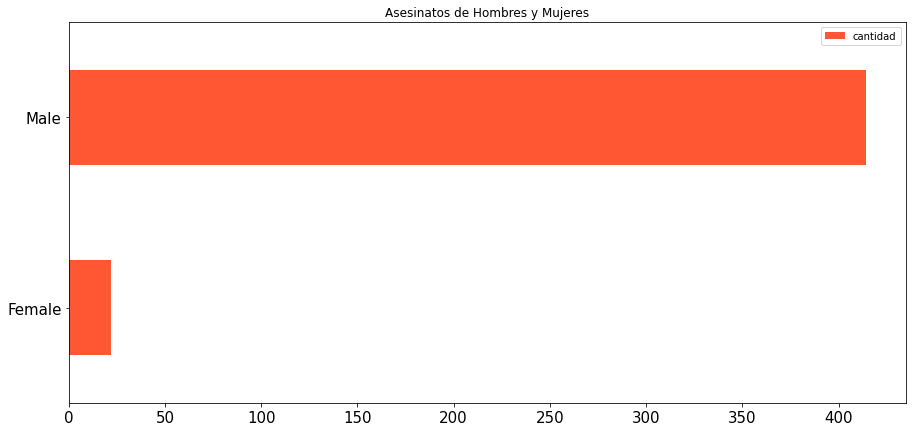

In [118]:
df_merged.loc['gender']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Asesinatos de Hombres y Mujeres", figsize=(15,7));

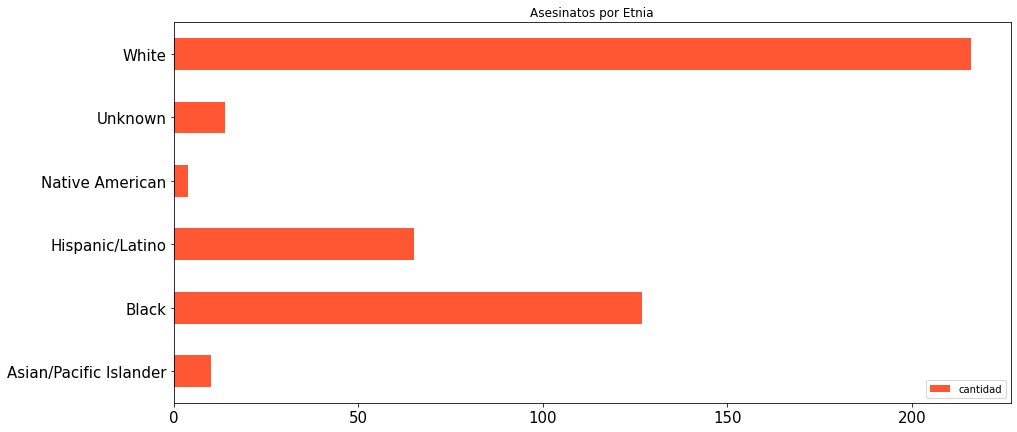

In [117]:
df_merged.loc['raceethnicity']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Asesinatos por Etnia", figsize=(15,7));

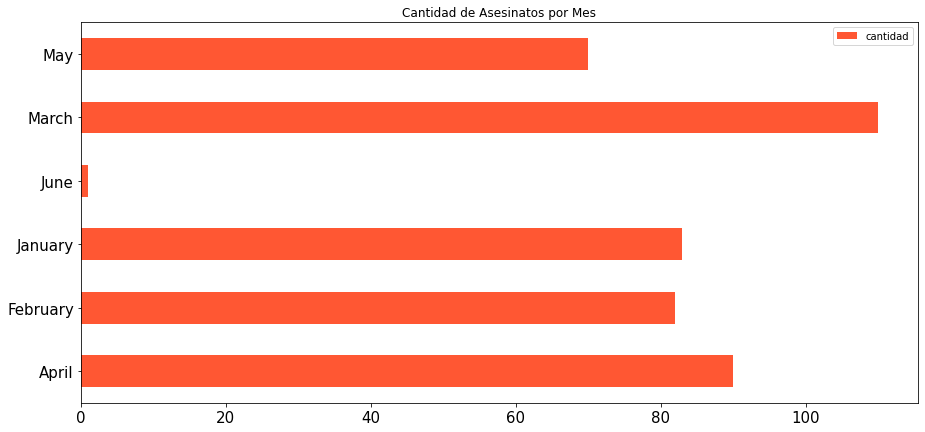

In [115]:
# Más arriba habíamos aclarado que el mes lo tomabamos como un dato cuantitativo, pero al estar
# codificado por el nombre en vez del número de mes, nos parecía bien incluirlo acá también 
# para ver, por nombre, que meses tienen las mayores cantidades de asesinatos.
df_merged.loc['month']\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Cantidad de Asesinatos por Mes", figsize=(15,7));

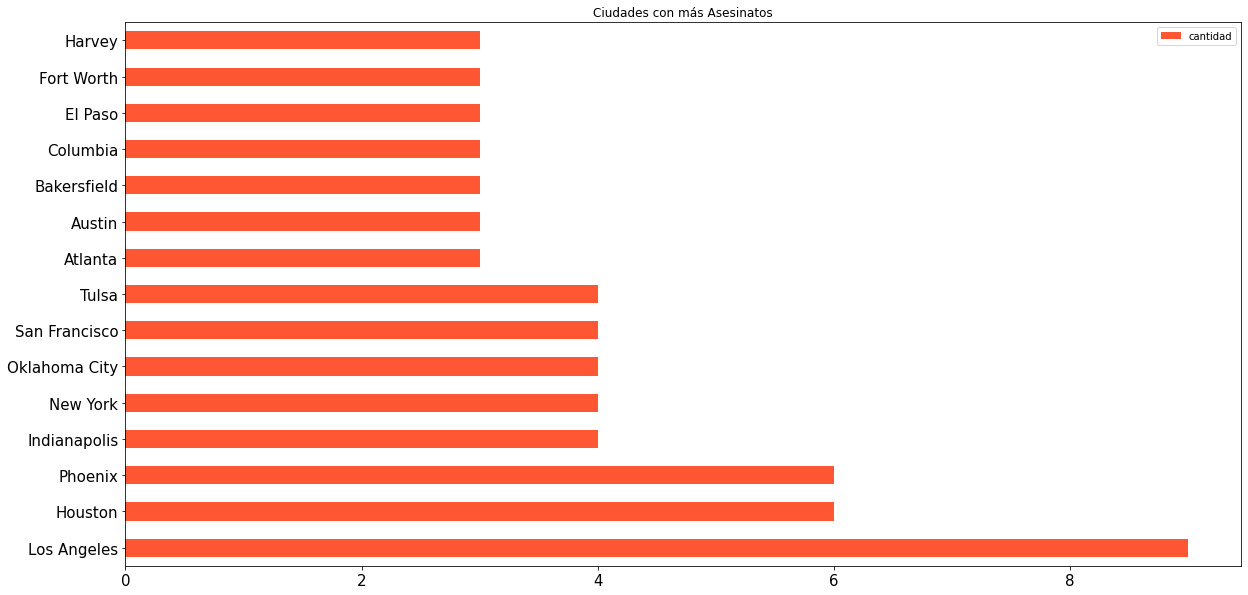

In [114]:
# Incluímos en el gráfico únicamente las 15 ciudades con más asesinatos. En caso de querer ver
# todos, comentar la llamada a nlargest(). 
df_merged.loc['city']\
         .nlargest(15,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Ciudades con más Asesinatos");

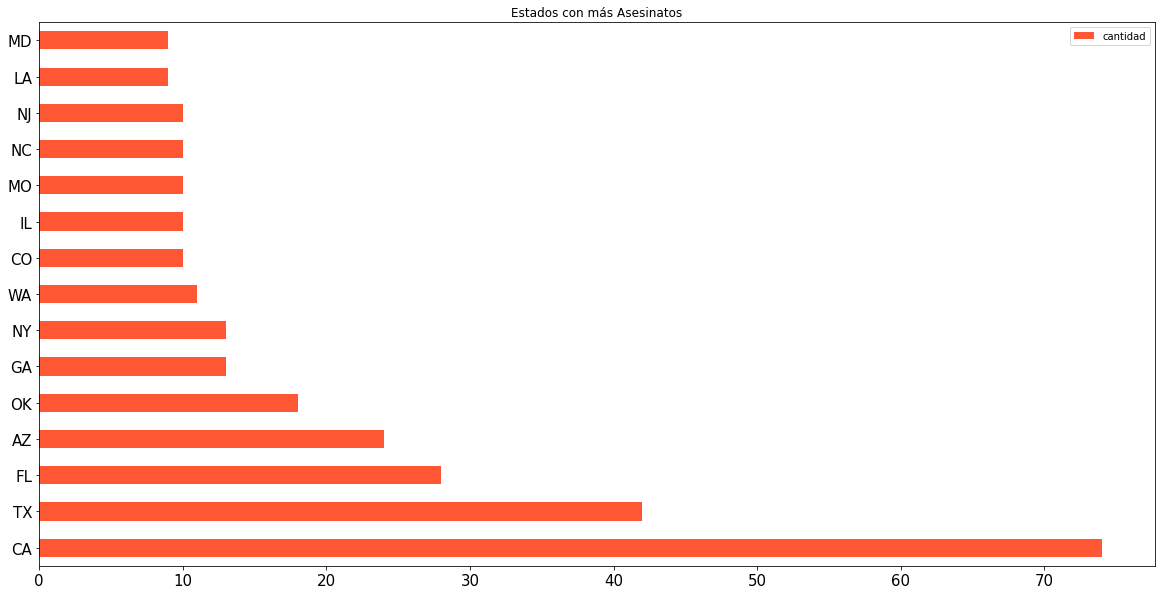

In [113]:
# Lo mismo que en la celda anterior; hay tantos estados que si en el gráfico se muestran todos
# los datos, el mismo perdería la capacidad de transmitir la información al lector.
df_merged.loc['state']\
         .nlargest(15,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Estados con más Asesinatos");

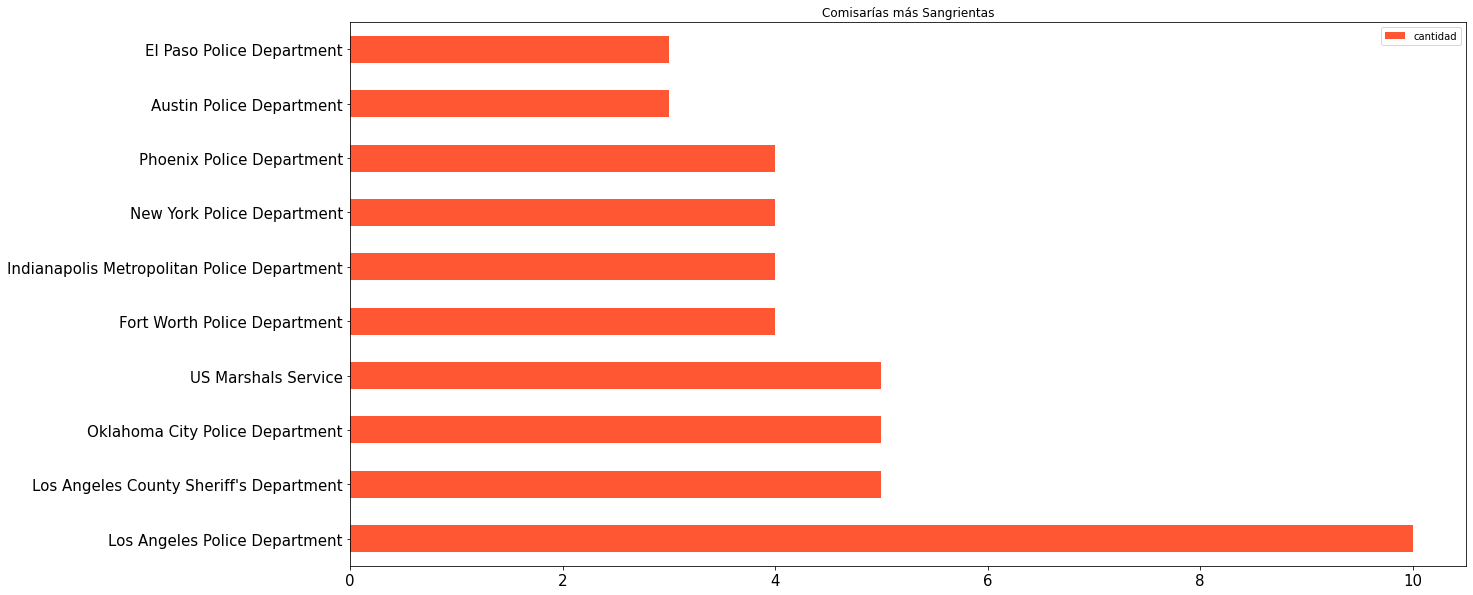

In [112]:
# Ídem el comentario de la celda anterior.
df_merged.loc["lawenforcementagency"]\
         .nlargest(10,"cantidad")\
         .plot(kind='barh', color=[red], width=0.5, figsize=(20,10), fontsize=15, title="Comisarías más Sangrientas");

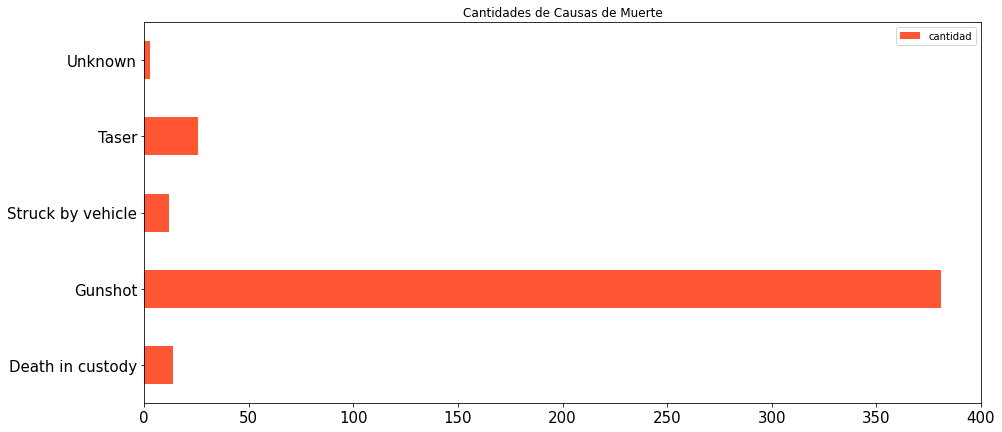

In [110]:
df_merged.loc["cause"]\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Cantidades de Causas de Muerte", figsize=(15,7));

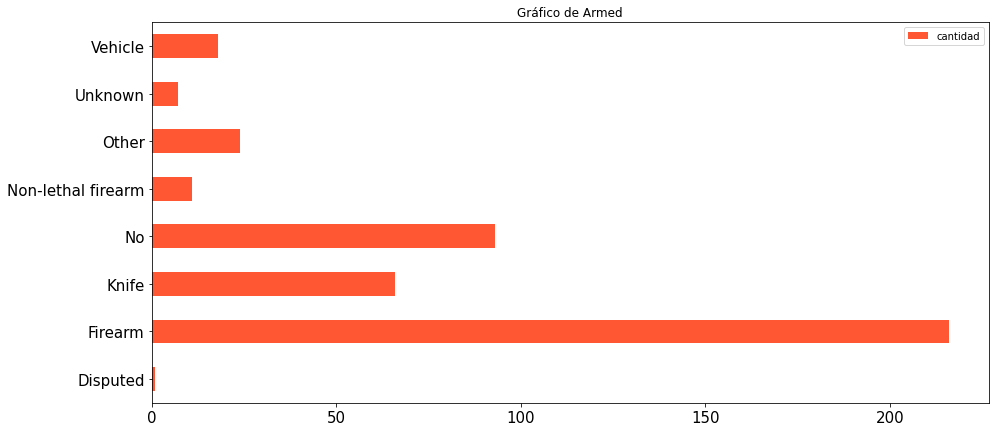

In [111]:
df_merged.loc["armed"]\
         .plot(kind='barh', color=[red], width=0.5, fontsize=15, title="Gráfico de Armed", figsize=(15,7));

## ¿Es posible realizar estos gráficos con un histograma?

No es posible representar las variables en un gráfico de histograma porque se está trabajando con variables cualitativas. Ya que el gráfico de histograma muestra la frecuencia de datos numéricos, cada columna representa un grupo definido por una variable cuantitativa, a diferencia del gráfico de barra, cada columna representa a un grupo definido por una variable categórica y se usa justamente para comparar diferentes categorías de datos.